In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv('customer_churn (2).csv')

In [77]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [78]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# the total charges datatype is wrong so i have to convert the data type into float

In [80]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
for i in df.columns:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [83]:
df.duplicated().sum()

0

In [124]:
df=df.drop(['customerID'],axis=1)

In [125]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [126]:
df.dropna(inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [ ]:
#check for outliers

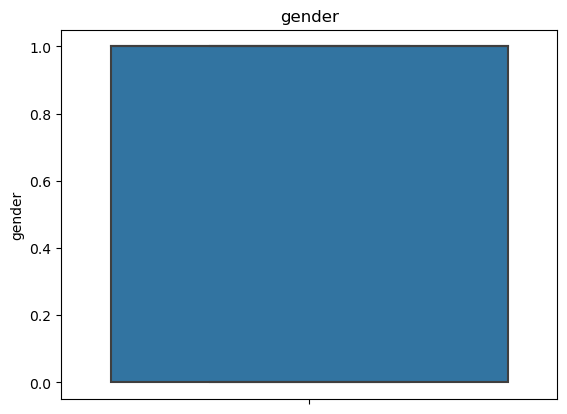

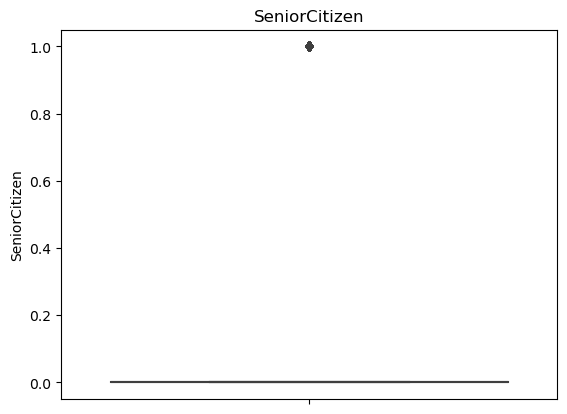

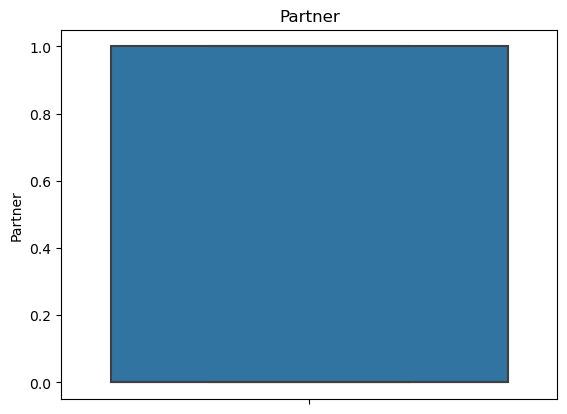

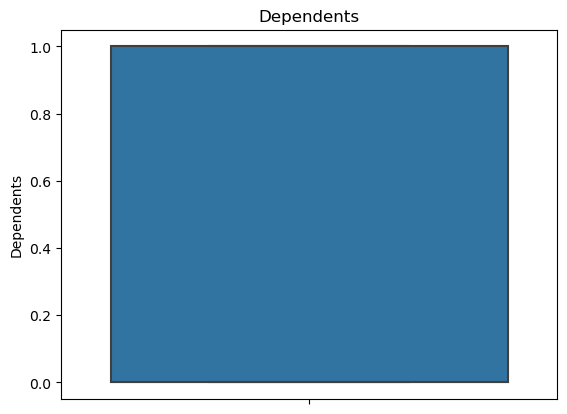

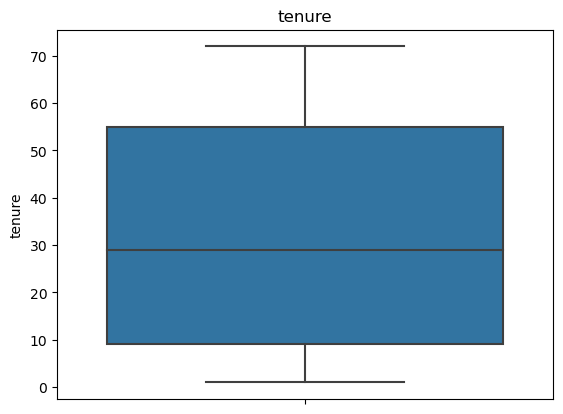

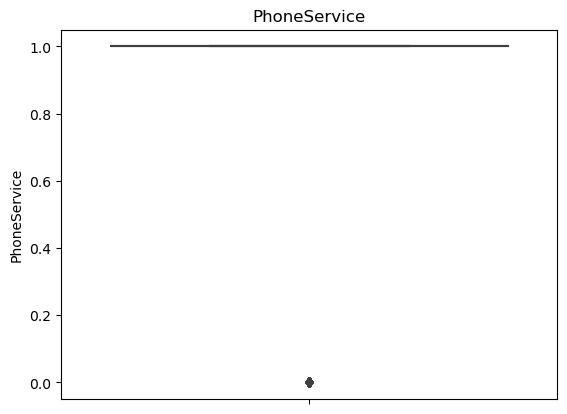

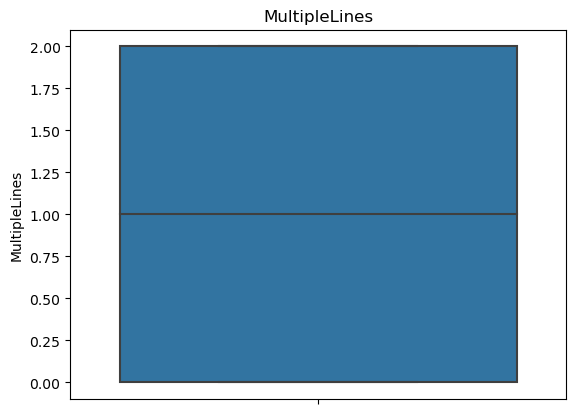

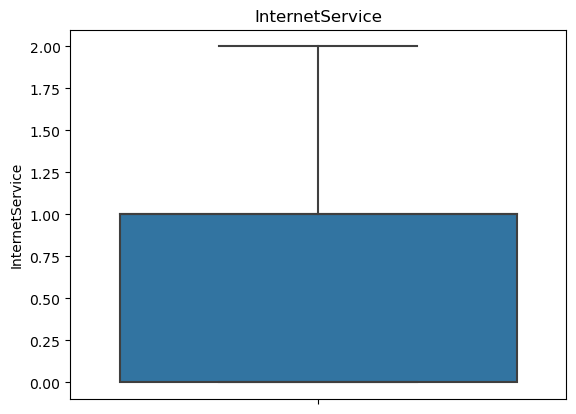

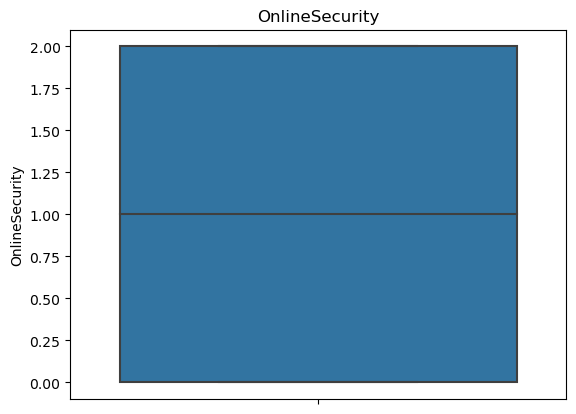

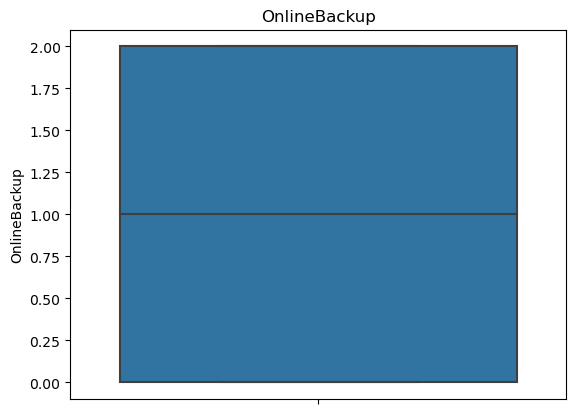

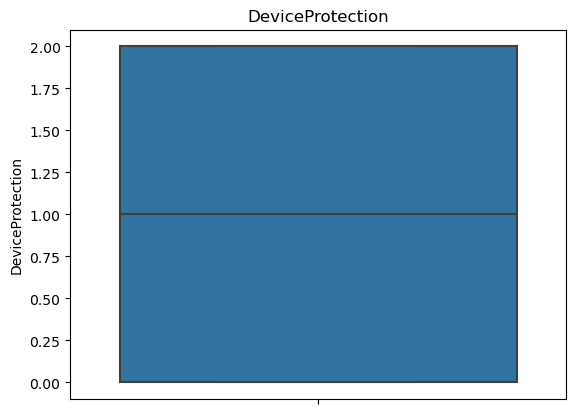

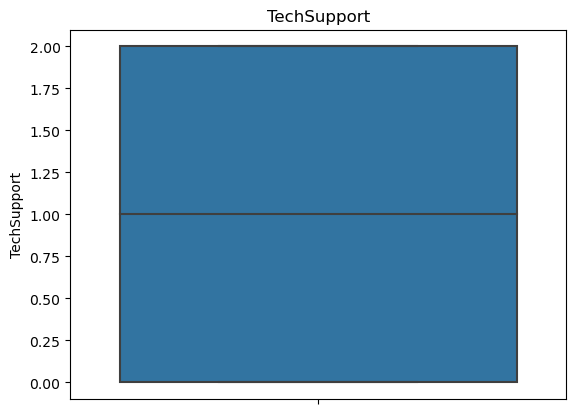

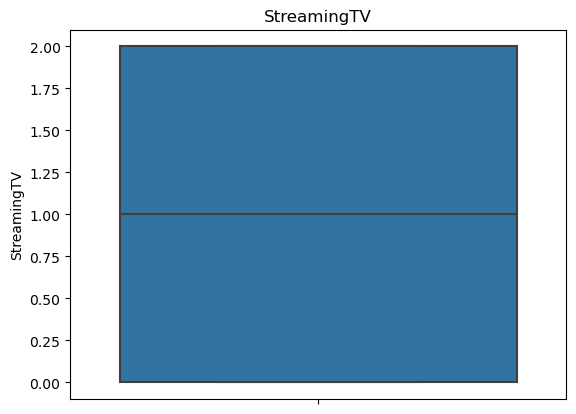

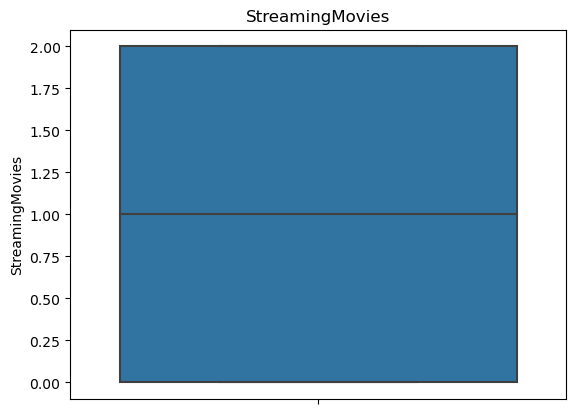

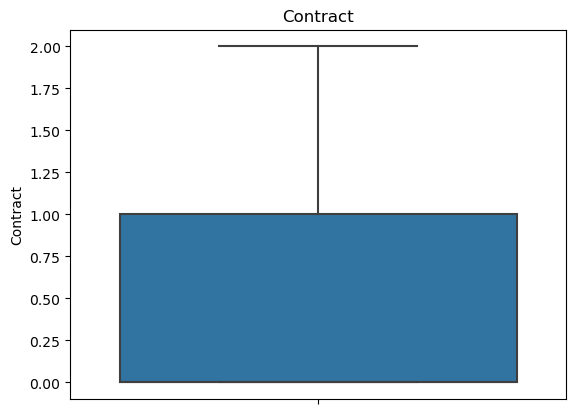

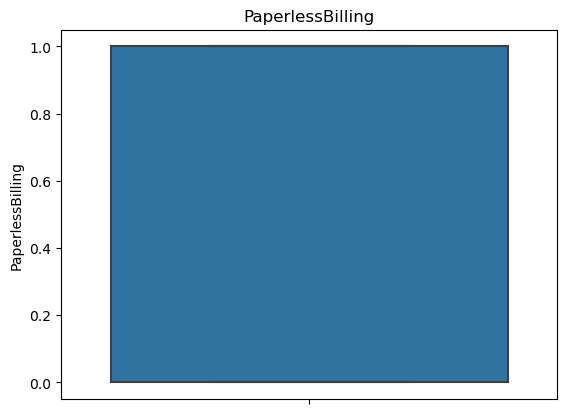

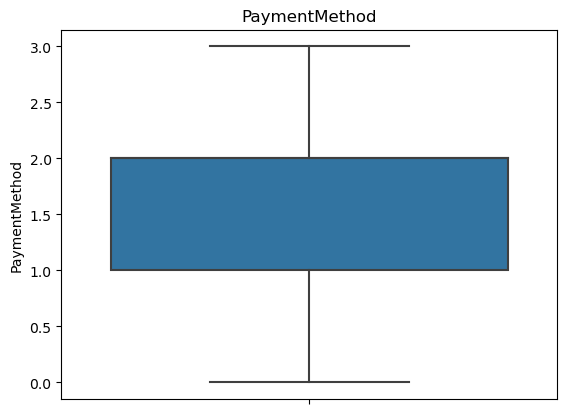

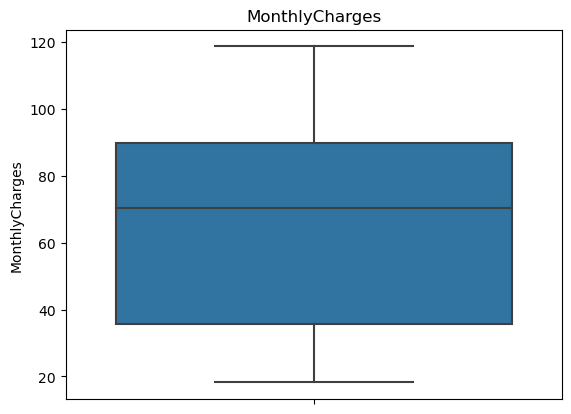

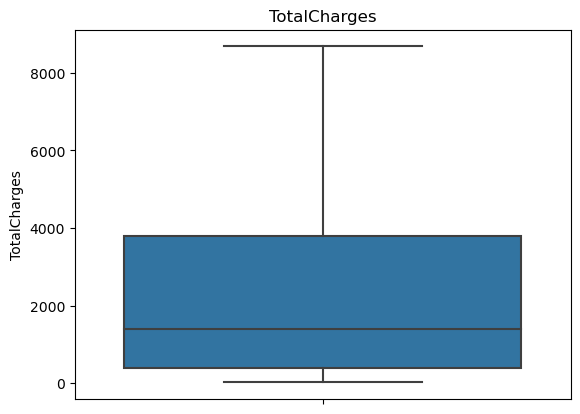

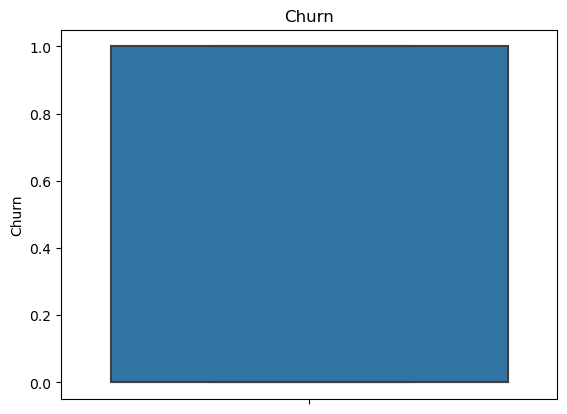

In [128]:
for i in df:
    if df[i].dtype!='object':
        sns.boxplot(y=i, data=df)
        plt.title(i)
        plt.show()

In [ ]:
#in senior citizen column only label encoder(0,1 values are present), that's whic for this boxplot is not there.

In [ ]:
#no such outliers are present in column

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
l=LabelEncoder()

In [131]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=l.fit_transform(df[col])

In [44]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3358,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5923,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


# feature Selection

In [132]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


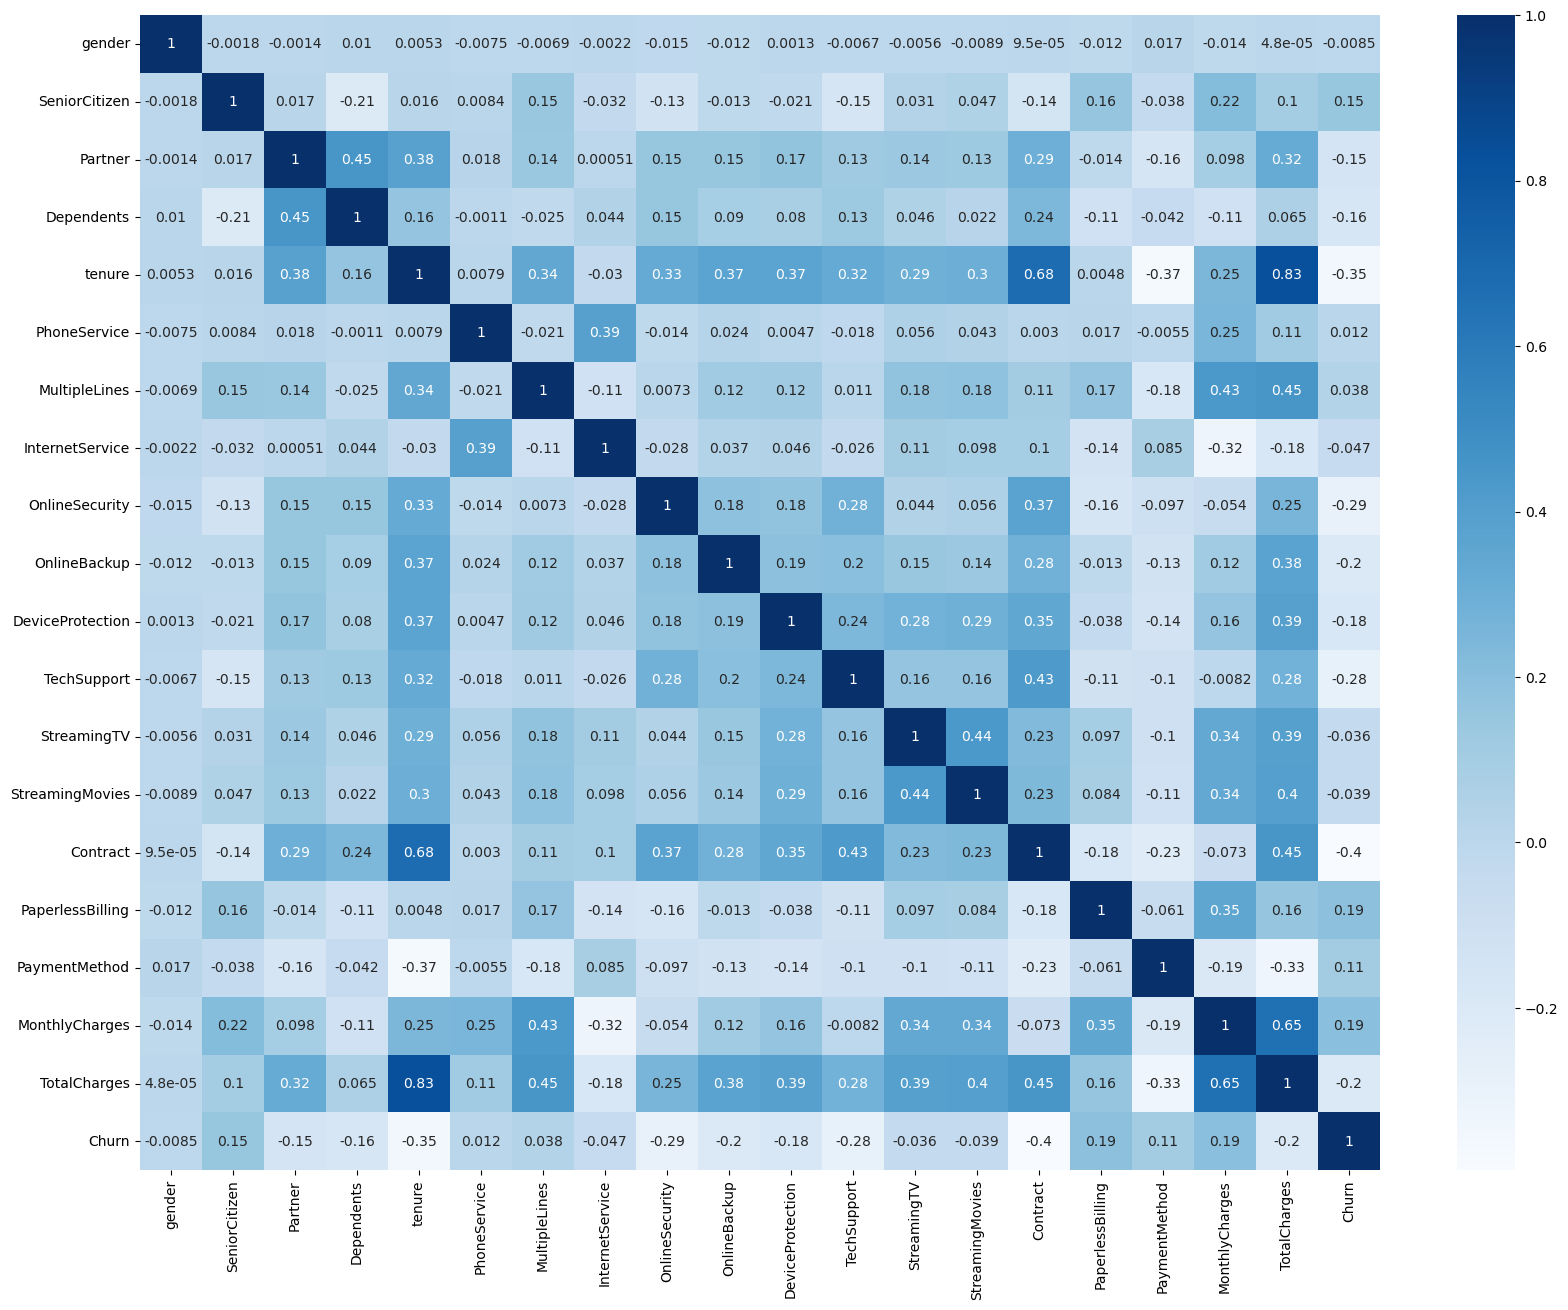

In [133]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.show()

In [ ]:
#here correlation is not giving a perfect relation now we should move on for VIF, our target variable is Churn

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
col=[]
for i in df.columns:
    if ((df[i].dtype !='object') & (i!='Churn')):
        col.append(i)

In [136]:
col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [137]:
x=df[col]

In [138]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [139]:
vif_n=pd.DataFrame()

In [140]:
vif_n

""


In [141]:
vif_n['features']=x.columns
vif_n['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_n

,features,VIF
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


In [142]:
x=x.drop(['MonthlyCharges'],axis=1)

In [143]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [144]:
#col=[]
#for i in df.columns:
#    if ((df[i].dtype !='object') & (i!='Churn')):
#        col.append(i)
#x=df[col]
# here commenting this so that it will no more take the data from df dataframe

vif_n=pd.DataFrame()
vif_n['features']=x.columns
vif_n['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_n

,features,VIF
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [145]:
x=x.drop(['tenure'],axis=1)

In [146]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   PhoneService      7032 non-null   int32  
 5   MultipleLines     7032 non-null   int32  
 6   InternetService   7032 non-null   int32  
 7   OnlineSecurity    7032 non-null   int32  
 8   OnlineBackup      7032 non-null   int32  
 9   DeviceProtection  7032 non-null   int32  
 10  TechSupport       7032 non-null   int32  
 11  StreamingTV       7032 non-null   int32  
 12  StreamingMovies   7032 non-null   int32  
 13  Contract          7032 non-null   int32  
 14  PaperlessBilling  7032 non-null   int32  
 15  PaymentMethod     7032 non-null   int32  
 16  TotalCharges      7032 non-null   float64
dtype

In [147]:
vif_n=pd.DataFrame()
vif_n['features']=x.columns
vif_n['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_n

,features,VIF
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [148]:
x=x.drop(['PhoneService'], axis=1)

In [149]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   MultipleLines     7032 non-null   int32  
 5   InternetService   7032 non-null   int32  
 6   OnlineSecurity    7032 non-null   int32  
 7   OnlineBackup      7032 non-null   int32  
 8   DeviceProtection  7032 non-null   int32  
 9   TechSupport       7032 non-null   int32  
 10  StreamingTV       7032 non-null   int32  
 11  StreamingMovies   7032 non-null   int32  
 12  Contract          7032 non-null   int32  
 13  PaperlessBilling  7032 non-null   int32  
 14  PaymentMethod     7032 non-null   int32  
 15  TotalCharges      7032 non-null   float64
dtypes: float64(1), int32(14), int64(1)
memory usage

In [150]:
vif_n=pd.DataFrame()
vif_n['features']=x.columns
vif_n['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_n

,features,VIF
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [151]:
x

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


In [ ]:
# Splitting the data into dependent and independent data

In [152]:
x #independent

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1889.50
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1840.75
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1990.50
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,7362.90
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,346.45
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,306.60


In [155]:
y=df['Churn']

In [156]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [ ]:
# split the data into train and testing

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7, random_state=45)

In [160]:
x_train

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
5841,1,1,0,0,1,0,0,0,0,0,2,2,1,1,2,3264.45
1513,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,25.80
6238,1,1,1,0,2,1,0,0,0,0,0,0,0,0,0,3919.15
4579,1,0,0,0,2,1,0,2,0,0,0,0,0,1,2,2640.55
5601,0,0,1,1,1,0,0,0,0,2,2,0,1,0,3,1383.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,1,0,0,0,0,2,1,1,1,1,1,1,1,0,3,607.70
3622,0,0,1,1,2,0,2,2,2,2,2,2,2,0,1,6652.45
6021,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,254.50
5772,1,0,1,1,2,0,0,2,2,2,2,2,2,1,0,5601.40


In [161]:
y_train

5841    1
1513    1
6238    0
4579    0
5601    0
       ..
4711    0
3622    0
6021    0
5772    0
6567    0
Name: Churn, Length: 4922, dtype: int32

In [162]:
x_test

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
2287,1,1,1,0,2,1,0,2,2,2,2,2,2,1,0,7318.20
2087,0,0,0,0,1,0,2,2,0,0,0,0,0,1,2,137.85
2308,1,0,1,1,0,1,2,2,2,0,2,2,1,1,0,7288.40
1960,0,0,1,1,2,1,0,2,2,2,0,0,0,0,1,2888.70
4634,0,0,0,0,0,2,1,1,1,1,1,1,0,0,0,53.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,69.95
1034,0,0,1,0,0,0,2,0,2,2,2,2,2,0,0,5924.40
6628,0,0,0,0,0,1,0,2,0,0,2,2,1,1,3,633.45
6101,0,1,0,0,2,1,2,0,2,2,2,2,2,0,1,7467.55


In [163]:
y_test

2287    1
2087    1
2308    0
1960    0
4634    0
       ..
6237    1
1034    0
6628    0
6101    0
713     0
Name: Churn, Length: 2110, dtype: int32

In [ ]:
# Model Implementation

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
log_model=LogisticRegression()

In [166]:
# training the model
log_model.fit(x_train, y_train)

LogisticRegression()

In [167]:
# testing part
log_pred=log_model.predict(x_test)

In [168]:
log_pred

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
new=list(zip(y_test,log_pred))

In [170]:
new

[(1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 

In [171]:
from sklearn.metrics import accuracy_score

In [173]:
accuracy_score(y_test,log_pred)

0.7815165876777251